<h1>Análisando as queimadas no Brasil</h1>

*   Este notebook faz parte das atividades práticas da Oficina de Ciência de Dados para estudantes da Educação Básica, fornecido pelo grupo InformAção (UFRJ) e Escola SESC.
*   Nesta atividade iremos aprender mais sobre como coletar, analisar e gerar gráficos a partir de dados referentes a um tema específico, neste caso dados sobre queimadas.
*   Todos os dados análisados foram extraídos do portal: [Programa Queimadas](https://queimadas.dgi.inpe.br/queimadas/dados-abertos/#)


<h2>1.   Preparando o ambiente de análise</h2>
A área de Ciência de Dados possui um gama diversa de ferramentas e linguagens de programação para executar as tarefa necessárias para análise de dados. As linguagens mais conhecidas e utilziadas são: Python, R, Matlab, Scala, C, C++, SAS, Java entre outras.
Durante esta demonstração iremos utilizar a linguagem Python, umas das mais utilizadas não somente na área de Ciência de Dados, como também em outras áreas. 

<h3>1.1.   Baixando e instalando as bibliotecas</h3>
Como primeiro passo necessitamos baixar bibliotecas importantes para a realização da análise dos dados de queimadas, estas bibliotecas são:

*   **Pandas** é uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados. Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais. É software livre sob a licensa licença BSD.
*   **NumPy** é um pacote para a linguagem Python que suporta arrays e matrizes multidimensionais, possuindo uma larga coleção de funções matemáticas para trabalhar com estas estruturas.
*   **Matplotlib** é uma biblioteca de software para criação de gráficos e visualizações de dados em geral, feita para a da linguagem de programação Python e sua extensão de matemática NumPy. Originalmente criada pelo biólogo e neurocientista americano John D.

In [ ]:
!pip install pandas numpy matplotlib

<h3>1.2.   Importando as bibliotecas utilizadas</h3>

Para utilizar as bibliotecas baixadas e nativas no python necessitamos a primeiro momento importar elas ao nosso ambiente.
Além das bibliotecas que instalamos anteriormente iremos utilizar as bibliotecas:

*   **OS** fornece uma maneira simples de usar funcionalidades que são dependentes de sistema operacional.
*   **Urllib** é um pacote que coleciona vários módulos para trabalhar com URLs



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib
import urllib.request


<h2>2.   Baixando e analisando o dataset sobre queimadas</h2>

Nosso primeiro dataset a ser analisado diz a respeito sobre o histórico de queimadas no bioma Pantanal. Neste dataset iremos incontrar a quantidade de queimadas em cada mês do ano desde 1998, assim como o total por ano, máximo, média e mínimo de cada mês.

Como primeiro passo devemos baixar o dataset no formato .csv para incluir em nosso ambiente. Baixamos o arquivo do portal Programa Queimadas e nomeamos como *historico_bioma_pantanal.csv*.

In [ ]:
csv_url_hist_pantanal = 'https://queimadas.dgi.inpe.br/queimadas/portal-static//bioma/csv_estatisticas/historico_bioma_pantanal.csv'
urllib.request.urlretrieve(csv_url_hist_pantanal, 'historico_bioma_pantanal.csv')


A partir disso podemos gerar um *dataframe* para que ele possa ser utilizado pela biblioteca **Pandas**.

In [ ]:
df = pd.read_csv('/content/historico_bioma_pantanal.csv', encoding='utf-8')
df

Podemos destacar algumas questões interessantes sobre este dataset. 
*  Nem todos os dados presentes no dataset estão completos, alguns sendo representados pelo caractere **"-"**. 
*  A coluna de ano é representada pelo nome de **Unnamed: 0**
*  As três últimas linhas não representam anos, mas sim **máximo**, **média** e **mínimo** de cada mês.
*  A última coluna representa não representa um mês, mas sim o **total** de queimadas a cada ano.

É essencial para análise de dados entender como os dados estão representados em um dataset, para assim podermos extrair o máximo de informações possíveis de um dataset.

Também devemos estar atentos a possíveis valores que possam prejudicar nosso dataset. Neste dataset temos o caracter **"-"** no qual podemos identificar como um dado que não foi coletado, contudo o nosso ambiente não reconhece esta informação. Para contornar este problema devemos substituir este caracter para um valor reconhecido pelo ambiente, neste caso o valor 0.

In [ ]:
df = df.replace(to_replace= '-', value = 0)
df

<h2>3.   Criação do gráfico de série histórica do pantanal</h2>


Como melhor analisar esses dados sem ser pelo meio de uma tabela? Depois de ter uma visão do dataset coletado, podemos começar a investigar e gerar alguns gráficos interessantes e extrair informações que não era possível ao analisar o dataset como um todo.

<h3>3.1.   Criação do gráfico de barras</h3>

Um gráfico interessante é a quantidade de queimadas por ano, assim devemos criar um gráfico de barras para melhor visualizar esses dados.

Sendo assim, devemos ter:
 *  Eixo x = **Anos**
 *  Eixo y = **Quantidade de queimadas**

Para termos nossos eixos para gerar o gráfico necessitamos criar as variáveis ```anos``` e ```total_queimadas```.

Como visto no dataset a coluna de anos está com o nome ```Unnamed: 0``` e os valores do total de queimadas estão contidos entre as linhas 1 e 25. 

Para criação da variável devemos obdecer a regra: ```df[coluna][linha]```. Neste caso como estamos querendo valores entre as linhas 1 e 25 devemos designar este intervalo, assim resultando em ```df['Unnamed: 0'][0:24]``` (O dataframe começa a contar do 0).

In [ ]:
ano = df['Unnamed: 0'][0:24].tolist()
print("Variável com a lista de anos de coleta de queimadas:")
print(ano)
total_queimadas = df['Total'][0:24].tolist()
print("Variável com a lista de total de queimadas por ano:")
print(total_queimadas)

O gráfico de barras é criado a partir da função ```plt.bar()``` onde identificamos as variáveis e condições opcionais para sua criação, sempre seguindo esta condição: ```plt.bar(x, y, condiçõesOpcionais)```

Para melhor visualização dos anos podemos toracionar a etiqueta de anos com a função ```plt.xticks(x, rotation=90)```

Por fim para gerar o gráfico devemos utilizar a função ```plt.show()```

In [ ]:
plt.bar(ano, total_queimadas, color='coral')
plt.xticks(ano, rotation=90)
plt.show()

<h3>3.2.   Criação do gráfico de linhas</h3>

A partir deste gráfico de barra podemos visualizar os dados com mais tranquilidade, e é perceptível a disparidade entre o ano de 2020 e os outros anos. A partir deste resultado podemos analisar mais alguns dados referentes ao ano de 2020.

Como foi visto na tabela temos dados referente a máximo, mínimo e média de cada ano, seria interessante construir um gráfico onde podemos visualizar melhor esses dados e comparar com os diversos anos existentes na tabela. Mais precisamente analisando a evolução dos meses do ano. Como primeiro gráfico iremos analisar o máximo de focos por mês

Sendo assim, devemos ter:
 *  Eixo x = **Meses**
 *  Eixo y = **Máximo de focos por mês**

In [ ]:
# Criação de uma variável com a lista dos meses do ano - eixo x
meses = df.columns[1:13].tolist() 
print("Variável com a lista de meses do ano:")
print(meses)

# Criação da lista com máximo de focos por mês - eixo y
max = df.loc[24, 'Janeiro':'Dezembro'].tolist()
# Neste caso criamos a variável a partir do df.loc[] para melhor acessar os dados que queremos a partir das condições.
# df.loc[linha, coluna_inicial:coluna_final]
print("Variável com a lista de máximo de queimadas em cada mês:")
print(max)

Ao analisar os dados da variável **max** é perceptível que alguns estão no formato texto (formato texto é representado por aspas simples, ou duplas), contudo para gerar o gráfico somente devemos utilizar variáveis no formato **int**. Para contornar este problema utilizamos a função ```map(int, dataframe)``` que converte todos os valores na variável em inteiros.

In [ ]:
max = list(map(int, max))
print("Variável com a lista de máximo de queimadas em cada mês no formato int: ")
print(max)

Com as variáveis definidas podemos gerar nosso gráfico de linhas.
Neste caso utilizamos a função ```plt.plot()```, onde identificamos as variáveis e condições opcionais para sua criação, sempre seguindo esta condição: ```plt.plot(x, y, condiçõesOpcionais)```.
Dentre as condições opcionais temos:
*  color = identificação da cor da linha.
*  marker = inclusão de marcadores para melhor visualização.
*  label = identificação da linha criada para gerar uma legenda a partir da função ```plt.label()```.



In [ ]:
plt.plot(meses, max, color='red', marker='o', label = 'Máximo')
plt.xticks(meses, rotation=90)
plt.legend()
plt.show()

A partir da geração deste gráfico podemos gerar mais outros dois gráficos a respeito dos valores mínimos e médios contido no dataset analisado. Além disso podemos unificar este três diferentes gráficos somente incluindo o ```plt.show()``` ao final da identificação de cada um dos gráficos gerados.

In [ ]:

# Criação da lista com média de focos por mês - eixo y
med = df.loc[25, 'Janeiro':'Dezembro'].tolist()
med = list(map(int, med))

# Criação da lista com mínimo de focos por mês - eixo y
min = df.loc[26, 'Janeiro':'Dezembro'].tolist()
min = list(map(int, min))

plt.plot(meses, max, color='red', marker='o', label = 'Máximo')
plt.plot(meses, med, color='darkorange', marker='o', label = 'Média')
plt.plot(meses, min, color='green', marker='o', label = 'Mínimo')
plt.xticks(meses, rotation=90)
plt.subplots_adjust(bottom=0.1, top=0.99) # Ajuste na dimensão do gráfico gerado
plt.legend()
plt.show()


<h3>3.3.   Unificação de diferentes gráficos</h3>

A partir da geração do gráfico de linhas podemos perceber que o segundo semestre de todos os anos coletados são mais propícios a queimadas.

Podemos ainda utilizar este gráfico para gerar uma comparação entre o número de queimadas durante os meses do ano. Vamos comparar os três últimos anos do dataset (2019 - 2021). Iremos gerar dois gráficos:
*  Comparação 2019-2020
*  Comparação 2020-2021


<h4>3.3.1.   Comparação 2019-2020</h4>

Geraremos os gráficos referente aos anos de 2019 e 2020 no formato de barras. Conforme mostrado anteriormente iremos utilizar a função ```df.loc(linha, colunaInicial:colunaFinal)``` para especificar a região do dataset que queremos. 

O ano de 2019 está contido na linha 21 do dataset e o ano de 2020 na linha 22.

Iremos utilizar novamente utilizar a função ```map(int, variável)``` pois os formatos contidos nas variáveis não são os mesmos.

Além disso, devemos incluir esta função *map* dentro de uma função ```list()``` pois o resultado gerado da função *map* retorna uma variável do tipo *map* e não do tipo *list* que é utilizada para geração dos gráficos.

In [ ]:
# Criação da lista com focos de 2019 por meses - eixo y
ano_19 = df.loc[21, 'Janeiro':'Dezembro'].tolist()
print("Variável lista ano_19 com formatos texto e int:")
print(ano_19)
ano_19 = map(int, ano_19)
print("Formato da varíavel ano_19 após o map")
print(type(ano_19))
ano_19 = list(ano_19)
print("Formato da varíavel ano_19 após o list")
print(type(ano_19))

# Criação da lista com focos de 2020 por meses - eixo y
ano_20 = df.loc[22, 'Janeiro':'Dezembro'].tolist()
ano_20 = list(map(int, ano_20))

<h4>3.3.1.   Comparação 2020-2021</h4>

Depois da criação das variáveis devemos gerar os gráficos como camadas, onde as primeiras deverão ser os gráficos de barra dos anos de 2020 e 2019. A ordem de inserção de cada gráfico obdece a ordem sequencial das linhas de execução.

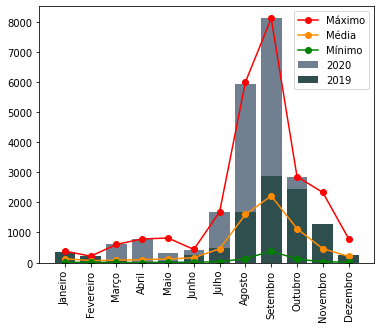

In [38]:
# Camadas da parte de trás
plt.bar(meses, ano_20, color='slategray', label=2020)
plt.bar(meses, ano_19, color='darkslategray', label=2019)
# Camadas da parte da frente
plt.plot(meses, max, color='red', marker='o', label = 'Máximo')
plt.plot(meses, med, color='darkorange', marker='o', label = 'Média')
plt.plot(meses, min, color='green', marker='o', label = 'Mínimo')
# Rotação da tag meses
plt.xticks(meses, rotation=90)
# Ajuste da geração do gráfico
plt.subplots_adjust(bottom=0.1, top=0.99)
# Geração da legenda
plt.legend()
plt.show()

É perceptível a disparidade do ano 2020 em relação ao ano de 2019. Agora compararemos os anos 2020 e 2021. Seguindo a mesma ordem de inserção usada anteriormente.

In [ ]:
# Criação da lista com focos de 2021 por meses - eixo y
ano_21 = df.loc[23, 'Janeiro':'Dezembro'].tolist()
ano_21 = list(map(int, ano_21))

plt.bar(meses, ano_20, color='slategray', label=2020)
plt.bar(meses, ano_21, color='darkslategray', label=2021)
plt.plot(meses, max, color='red', marker='o', label = 'Máximo')
plt.plot(meses, med, color='darkorange', marker='o', label = 'Média')
plt.plot(meses, min, color='green', marker='o', label = 'Mínimo')
plt.xticks(meses, rotation=90)
plt.subplots_adjust(bottom=0.1, top=0.99)
plt.legend()
plt.show()

<h2>2.   Baixando e analisando o dataset de Setembro de 2021</h2>

A partir da geração do gráfico é perceptível que o ano de 2020 foi um dos com mais queimadas, principalmente nos meses de Março, Abril, Junho, Agosto, Setembro, Outubro.

Como é perceptível o mês de setembro é um dos que mais há casos de queimadas, podemos analisar um outro dataset referente somente ao mês de setembro.

Obs: O arquivo utilizado possui por volta de 250 MB, o que pode demorar um pouco para ser baixado.

In [40]:
# Baixando o arquivo referente à focos no mês de setembro de 2021 em nosso colab
csv_focos = 'https://queimadas.dgi.inpe.br/home/downloadfile?path=%2Fapp%2Fapi%2Fdata%2Fdados_abertos%2Ffocos%2FMensal%2Ffocos_abertos_mensal_202109.csv'
urllib.request.urlretrieve(csv_focos, 'focos_abertos_mensal_202109.csv')
# Criando um dataframe dos dados contido no arquivo csv
df_focos = pd.read_csv('/content/focos_abertos_mensal_202109.csv', encoding='utf-8')
# Visualizando os dados dentro do dataframe
print(df_focos)

              lat        lon                 data satelite
0       -25.00000   21.41000  2021-09-01 01:02:55   MSG-03
1       -25.00000   21.44000  2021-09-01 01:02:55   MSG-03
2        55.57000 -100.69000  2021-09-01 00:20:19  GOES-16
3        47.99000 -120.39000  2021-09-01 00:19:49  GOES-16
4        45.57000 -115.85000  2021-09-01 00:19:41  GOES-16
...           ...        ...                  ...      ...
5613413 -10.00372   36.33722  2021-09-30 22:44:00  NOAA-20
5613414 -10.00290   28.17615  2021-09-30 22:46:00  NOAA-20
5613415 -10.00169   36.47630  2021-09-30 22:44:00  NOAA-20
5613416 -10.00002   28.17663  2021-09-30 22:46:00  NOAA-20
5613417  -0.50264   39.65019  2021-09-30 22:42:00  NOAA-20

[5613418 rows x 4 columns]


Diferentemente do arquivo anterior, neste podemos ver informações a respeito de focos de calor captados por diferentes satélites em diferentes horários. Neste caso podemos utilizar as colunas de Latitude e Longitude como nossos eixos em um gráfico.

Além disso, este dataset utilizado é muito maior que o anterior, mais de 5.600.000 registros. Claro que podemos tentar utiliziar o dataset todo para nossos estudos, contudo toda operação realizada no dataset custará tempo por conta da quantidade de registros e possivelmente podemos ter dados duplicados tendo em vista que diferentes datasets podem coletar o dados sobre um mesmo ponto de calor.





In [43]:
# Quantidade de satélites diferentes neste dataset e quantidade de registros em cada satélite
print('Quantidade de registros de cada satélite')
print(df_focos['satelite'].value_counts())


Quantidade de registros de cada satélite
NPP-375      2264172
NOAA-20      2223505
GOES-16       571470
AQUA_M-T      177196
AQUA_M-M      124803
TERRA_M-M     108111
TERRA_M-T      56391
NOAA-19        41646
MSG-03         18770
METOP-B        16581
NOAA-18         8629
METOP-C         2144
Name: satelite, dtype: int64


Para contornar isto devemos escolher o satélite que melhor atende nosso objetivo, analisar focos de queimadas no território brasileiro. O satélite que melhor atende nossas expectativas é o GOES-16, onde foca sobre o continente americano.

Sendo assim criaremos uma cópia do dataset coletado mas somente dos registros do satélite GOES-16. Para isso devemos especificar que só desejamos os registros em que a **coluna satelite** contenha o nome GOES-16:
```
df_focos[df_focos.coluna == 'texto']
```


In [ ]:
# Utilizaremos o satelite 'GOES-16' para nossa análise
df_satelite = df_focos[df_focos.satelite == 'GOES-16']
print(df_satelite)

Com o novo dataset criado podemos gerar um gráfico com os dados de latitude e longitude para identificarmos as regiões com maiores focos de calor coletados pelo satélite escolhido. Neste caso nosso eixos serão:

*  Eixo x = **Latitude**
*  Eixo y = **Longitude**

Utilizaremos neste caso a função ```plt.scatter(x, y, condiçõesOpcionais)``` na qual gera um gráfico com todos os pontos a partir da latitude e longitude coletadas. Suas condições opcionais são:
*  label = tipo do ponto gerado ()
*  color = cor do ponto.
*  s = tamanho do ponto gerado.

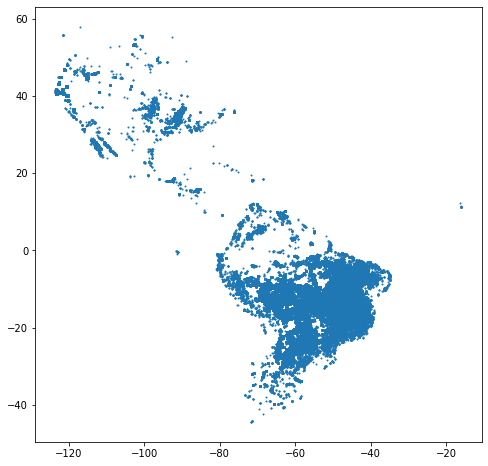

In [50]:
# Plotando as coordenadas de focos no mês de setembro de 2021
lat = df_satelite['lat'].tolist()
lon = df_satelite['lon'].tolist()
plt.rcParams["figure.figsize"] = (8,8) #Alterando a resolução do gráfico para melhor visualização
plt.scatter(lon, lat, marker= "o", color= "#1f77b4", s=1)
plt.show()

A partir da utilização do satélite GOES-16 podemos extrair focos de calor 

                                                  FID  ...                         geom
0   focos_brasil_ontem_hoje_ref.d49ff360-19dd-36fe...  ...  POINT (-12.37147 -52.70927)
1   focos_brasil_ontem_hoje_ref.0020d3e4-3387-3f80...  ...  POINT (-11.33547 -51.75836)
2   focos_brasil_ontem_hoje_ref.ac9dda40-b83a-3ee4...  ...  POINT (-11.32505 -51.76707)
3   focos_brasil_ontem_hoje_ref.6d76c9fb-39e5-3c80...  ...  POINT (-10.56755 -51.97307)
4   focos_brasil_ontem_hoje_ref.2999fd5c-892f-332b...  ...  POINT (-10.56063 -50.81063)
..                                                ...  ...                          ...
69  focos_brasil_ontem_hoje_ref.573f16f0-228e-3fa1...  ...  POINT (-17.39242 -57.32523)
70  focos_brasil_ontem_hoje_ref.aa9a2b94-7802-3ea9...  ...  POINT (-17.39379 -57.33553)
71  focos_brasil_ontem_hoje_ref.a0310261-9080-3810...  ...  POINT (-17.41399 -57.34308)
72  focos_brasil_ontem_hoje_ref.911d2b48-a5e7-3227...  ...  POINT (-17.42341 -57.34169)
73  focos_brasil_ontem_hoje_ref.

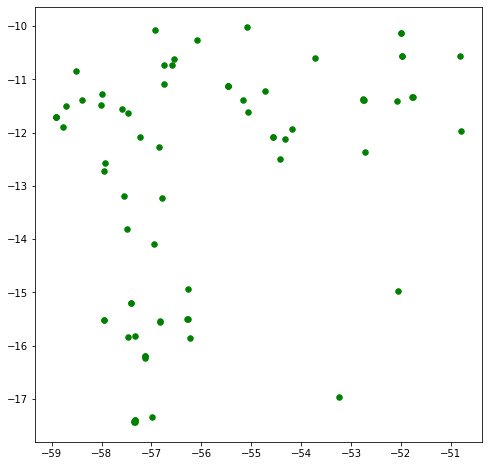

In [ ]:
# Coordenadas focos de calor Mato Grosso
# Baixando o arquivo referente à focos no mês de setembro de 2021 em nosso colab
csv_mt = 'https://queimadas.dgi.inpe.br/home/download?id=focos_brasil_mt&time=48h&outputFormat=csv&utm_source=landing-page&utm_medium=landing-page&utm_campaign=dados-abertos&utm_content=focos_brasil_mt_48h'
urllib.request.urlretrieve(csv_mt, 'focos48h_estados_MT.csv')
df_mt = pd.read_csv('/content/focos48h_estados_MT.csv')
print(df_mt)
head = list(df_mt.columns.values)
lat = df_mt['latitude'].tolist()
lon = df_mt['longitude'].tolist()
plt.scatter(lon, lat, label= "stars", color= "green", s=30)
plt.show()

In [ ]:
# Focos X Municipios - Lista
df_mun = df_mt.groupby(['municipio']).nunique().sort_values(by=['FID'], ascending=False)
print('Focos de incêndio nas últimas 48 horas em MT')
print(df_mun['FID'])

Focos de incêndio nas últimas 48 horas em MT
municipio
JUÍNA                          6
POCONÉ                         6
CÁCERES                        5
SÃO FÉLIX DO ARAGUAIA          4
JUARA                          4
FELIZ NATAL                    4
TABAPORÃ                       3
NOSSA SENHORA DO LIVRAMENTO    3
ITAÚBA                         3
DIAMANTINO                     2
PORTO ALEGRE DO NORTE          2
MIRASSOL D'OESTE               2
ALTA FLORESTA                  2
CONFRESA                       2
CANABRAVA DO NORTE             2
BARRA DO BUGRES                2
BRASNORTE                      2
VÁRZEA GRANDE                  2
CLÁUDIA                        2
MARCELÂNDIA                    1
CASTANHEIRA                    1
SÃO JOSÉ DO RIO CLARO          1
BARRA DO GARÇAS                1
SANTA TEREZINHA                1
ROSÁRIO OESTE                  1
QUERÊNCIA                      1
CAMPO NOVO DO PARECIS          1
CARLINDA                       1
NOVO SANTO ANTÔNIO   

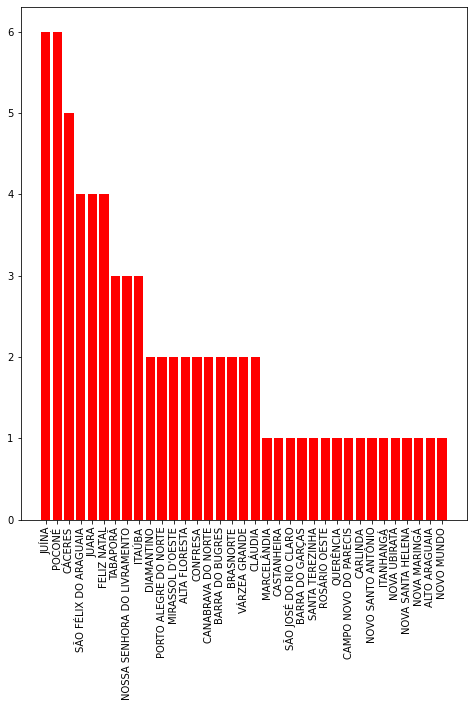

In [ ]:
# Focos X Municipios  = Gráfico
municipios = df_mun.index.tolist()
focos_mun = df_mun['FID'].tolist()
plt.bar(municipios, focos_mun, color='red')
plt.xticks(municipios, rotation=90)
plt.subplots_adjust(bottom=0.1, top=0.99)
plt.show()

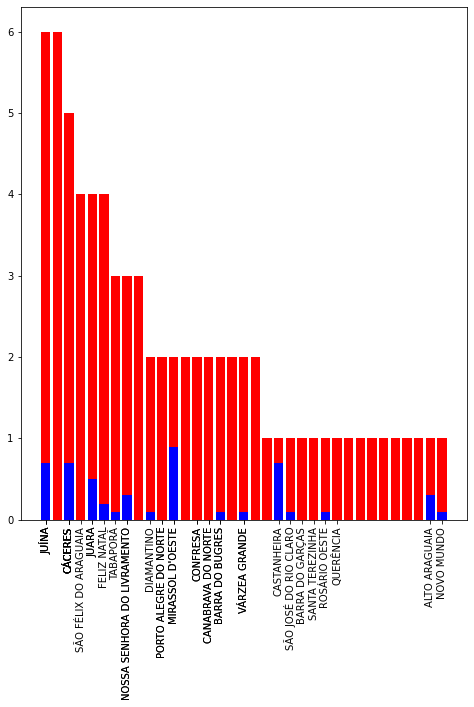

In [ ]:
# Incidências de focos por município (vermelho) com risco fogo por município (azul)
municipios = df_mun.index.tolist()
focos_mun = df_mun['FID'].tolist()
plt.bar(municipios, focos_mun, color='red')
plt.xticks(municipios, rotation=90)
plt.subplots_adjust(bottom=0.1, top=0.99)

df_3 = df_mt[['id', 'municipio', 'risco_fogo']]
df_3 = df_3.loc[df_3['risco_fogo'] != 0]
ano = df_3['municipio'].tolist()
total = df_3['risco_fogo'].tolist()
#total = [element * 2 for element in total] # multiplica o índice por 2
plt.bar(ano, total, color='blue')
plt.xticks(ano, rotation=90)
plt.subplots_adjust(bottom=0.1, top=0.99)

plt.show()

